**Trends in the Electric Vehicle Market through a Cluster-Driven Model for Automotive Commodities**

In the growing excitement for electric vehicles (EVs) and their pivotal role in the automotive industry's evolution, this supervised learning project aims to classify EV-related companies as commodities. Traditionally, commodities like crude oil, gold, and agricultural products have been subjects of in-depth analysis, but the unique dynamics of the EV market deserve closer examination.

In contrast to conventional commodities, the valuation of EV-related companies often extends beyond traditional financial metrics. The underlying value of these entities involves not only their financial performance but also factors such as technological advancements, market trends, and sustainability initiatives. The shift towards electric mobility introduces complexities that challenge conventional valuation methods, prompting a closer look at the use case and utility of these companies in the evolving automotive landscape.

Companies like Tesla, Rivian Automotive, NIO, Lucid, Polestar Automotive, Honda Motors, Toyota, and General Motors are at the forefront of this transformation.


**Why Explore Commodity Clusters in the Analysis of Electric Vehicles (EVs)?**

When investigating electric vehicles (EVs) alongside traditional commodities like Bitcoin, the correlation of their prices within a broader pool of commodities becomes discernible. Incorporating EVs into groups with regularly traded commodities opens up a new avenue for analysis. This approach allows for a distinct category of examination, where traders can seamlessly transition from one commodity to another based on changing economic conditions or when opportunities justify a shift in trading focus.

For instance, a trend shift from one aspect of the electric vehicle market to another, as seen in response to evolving industry dynamics, illustrates the dynamic nature of commodity markets. This exploration into commodity clusters provides insights into the interconnectedness and potential shifts in trading patterns across various commodities, particularly within the evolving landscape of electric vehicles.


**Using Cluster Matrices to Study Covariant, Affine Price Behaviors between Bitcoin and Other Commodity Flows**

This study samples the recent price behavior of 9 commodities, then traces the covariant, linear behavior, matrix style. Affine, or common mover groups are established, and presented interactively, for the viewer in a visual milieu.

Discussion of data pipeline used, and the subsequent data transformations needed in order to create this affine matrix, as well as the technical tools to facilitate this.

**Overview of Data Science Techniques**

The pipeline includes downloading data, introducing processing efficiencies, model building and cross validation, and cluster expression. I outline my steps as I take them, to arrive at a matrix of pricing which affords the following advantages.

The experiement was adapted from scikit-learn's own documentation, where the techniques were applied to the US stock market. My rendition creates several departures while adapting the advantage of Varoquaux's pipeline.[1]

1. The data ingest is fast, efficient, updateable and portable. Anyone may use this code to build a working model of US-traded commodities, and add symbols they wish to see, where I have missed them.
2. Data represent public, recently settled trades.
3. Local CPU resources are used in order to use notebook memory efficiently, and leverage local Linux resources.
4. Data remains in perpetuity for the analyst, or it may be rebuilt, using updated, daily trade series.
5. Data is built as a time series, in the OHLC format, where Opening, Closing, High and daily Low prices are located.
6. Clustering is aimed toward predictive use, where clusters can achieve whatever size is needed, to cluster affine, covariant items
7. Every commodity under consideration is measured for covariance against each other, to locate a product that trades in the same linear way
8. Sparse Inverse Covariance is the technique used to identify relationships between every item in the Matrix, and thus explose clusters of products, trading similarly. This is a list of connected items, trading conditionally upon the others.Thus the list is a useable, probable list of items which trade in the same way, over a week of US business.
9. An edge model exposes the borders for classification, and locates clusters at its discretion. Thus, no supervised limits are imposed in cluster formation.
10. Hyperparameters are determined via search with a predetermined number of folds, where each subset is used to locate model parameters, which are averaged at the close of the run.
11. Given the large volume of colinear features, a cross validation technique is used to 'lasso' model features.

**Building the Data Science Environment for Linux and Python**

Use the following commands to interface with your underlying linux environment. These may not need to be commented out, but will remain necessary each time a new kernel boot, in your notebook, takes place.

In [1]:
!pip install yfinance
!pip install vega_datasets

**Data Ingest from Public Markets**

The free, common Yahoo Finace API is used to download data from all commodites you wish to see studied. This data will be stored persistently next to your notebook in common environments such as Binder.

Please note that if you deploy this notebook in Google Collab that the 37+ files downloaded will be erased between uses, but can be rebuilt easily each time you operate this notebook.

The data you download becomes permanently usable, and the ingest request below can be customized in order to grab more, or less data and at different intervals.[2]

I have included several exceptions to the download and renaming technique, in order to tolerate commodities with differing ticker symbols.

In [2]:
import yfinance as yf
from time import time,ctime, clock_gettime
from time import gmtime, time, time_ns

def ifs(input):
    ni = ''
    if input =='gff':
        input = 'GFF'
        ni = "GF=F"
    elif input == 'zff':
        input = 'ZFF'
        ni = "ZF=F"
    else:
        input = input.upper()
        ins = "="
        before = "F"
        ni = input.replace(before, ins + before , 1)
    print(ni)
    data = yf.download(
        tickers = ni,
        period = "500d",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
    epoch = ctime()
    filename = input
    data.to_csv(filename)
#!ls #only in jupy

**Trigger Data Downloads**

The following code customizes the commodities under investigation. In order to compare every commodity's price history versus the rest in your matrix, the lengths of the data captures are minimized to the length of the smallest data set. Thus, larger sets are only captured at the length of the smallest set.

The volatility of every price tick is calculated via [close price minus open price].

In [3]:
  #symbol_dict = {"clf":"crude oil", "esf":"E-Mini S&P 500","btcf":"Bitcoin","bzf":"Brent Crude Oil", "ccf":"Cocoa","ctf":"Cotton","gcf":"Gold",
#          "lbsf":"Lumber","lef":"Live Cattle","mgcf":"Micro Gold","ngf":"Natural Gas","nqf":"Nasdaq 100","ojf":"Orange Juice","paf":"Palladium","plf":"Chicago Ethanol (Platts)",
#             "rbf":"RBOB Gasoline","rtyf":"E-mini Russell 2000","sbf":"Sugar #11","sif":"Silver","silf":"Micro Silver","ymf":"Mini Dow Jones Indus","zbf":"U.S. Treasury Bond Futures",
#             "zcf":"Corn","zff":"Five-Year US Treasury Note","zlf":"Soybean Oil Futures","zmf":"Soybean Meal","znf":"10-Year T-Note","zof":"Oat Futures","zrf":"Rough Rice",
#             "zsf":"Soybean","ztf":"2-Year T-Note"} #QQ, SPY , TNX, VIX
#

symbol_dict = {"TSLA": "Tesla", "RIVN": "Rivian Automotive", "NIO": "NIO", "LCID": "Lucid",
               "PSNY": "Polestar Automotive", "HMC": "Honda Motors", "TM": "Toyota", "GM": "General Motors", "BTCF":"BitCoin"} # Automotive / EV Market

#symbol_dict = {"AMZN": "Amazon","TGT": "Target", "M": "Macys", "KSS":"Kohl's", "JWN": "Nordstrom",
 #             "GPS": "Gap", "WMT": "Walmart", "COST":"Costco"} #Retail / Online Store

 #symbol_dict = { "META": "Meta Platforms, Inc.", "SNAP": "Snap Inc.", "PINS": "Pinterest, Inc.",
#.                "GOOGL": "Alphabet Inc. (Google)","TCEHY": "Tencent Holdings Limited", "AAPL": "Apple Inc.",} #Social Media

# symbol_dict = {
  #  "AAPL": "Apple Inc.", "GOOGL": "Alphabet Inc. (Google)", "AMZN": "Amazon.com Inc.","TSLA": "Tesla, Inc.",
  #  "NVDA": "NVIDIA Corporation","INTC": "Intel Corporation","AMD": "Advanced Micro Devices, Inc."} #Tech Company


In [4]:
#read in csv data from each commodity capture, gather
#assign 'open' to an array, create df from arrays
import numpy as np
import pandas as pd
from  scipy.stats import pearsonr


sym, names = np.array(sorted(symbol_dict.items())).T

for i in sym:    #build all symbol csvs, will populate/appear in your binder. Use linux for efficient dp
    ifs(i)

quotes = []
lens = []
for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    lens.append(t.shape[0])
mm = np.amin(lens)-1
print("min length of data: ",mm)

for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    t= t.truncate(after=mm)
    quotes.append(t)
mi = np.vstack([q["Close"] for q in quotes]) #min
ma = np.vstack([q["Open"] for q in quotes]) #max

volatility = ma - mi

BTC=F
[*********************100%%**********************]  1 of 1 completed
GM
[*********************100%%**********************]  1 of 1 completed
HMC
[*********************100%%**********************]  1 of 1 completed
LCID
[*********************100%%**********************]  1 of 1 completed
NIO
[*********************100%%**********************]  1 of 1 completed
PSNY
[*********************100%%**********************]  1 of 1 completed
RIVN
[*********************100%%**********************]  1 of 1 completed
TM
[*********************100%%**********************]  1 of 1 completed
TSLA
[*********************100%%**********************]  1 of 1 completed
min length of data:  413


# New Section

# New Section

**Data Format**

After downloading this massive store of data, you should click on a file, in your project. Using the file browser, you will see a large quantity of new files.

When you open one, you will see the rows of new data.


**Cross Validate for Optimal Parameters: the Lasso**

Varoquaux's pipeline involves steps in the following two cells.

A set of clusters is built using a set of predefined edges, called the edge model. The volatility of every OHLC tick is fed into the edge model, in order to establish every commodity's covariance to eachother.

The advantages of the Graphical Lasso model is that a cross validated average set of hyperparameters is located, then applied to cluster each commodity. Thus, every commodity is identified with other commodities which move in tandem, together, over seven days. I print the alpha edges below, and visualize this group.

Depending upon the markets when you run this study, more intensive clustering may take place at either end of the spectrum. This exposes the covariance between different groups, while exposing outlier clusters.

**Using the Interactive Graph**

Feel free to move your mouse into the graph, then roll your mouse. This will drill in/out and allow you to hover over data points. They will mape to the edges of the clusters, under investigation.




In [5]:
from sklearn import covariance
import altair as alt
alphas = np.logspace(-1.5, 1, num=15)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)
X = volatility.copy().T
X /= X.std(axis=0)
l =edge_model.fit(X)
n= []
print(type(l.alphas))
for  i in range(len(l.alphas)):
    print(l.alphas[i])
    dict = {"idx":i , "alpha":l.alphas[i]}
    n.append(dict)

dd = pd.DataFrame(n)
alt.Chart(dd).mark_point(filled=True, size=100).encode(
    y=alt.Y('idx'),
    x=alt.X('alpha'),tooltip=['alpha'],).properties(
        width=800,
        height=400,
        title="Edges Present Within the Graphical Lasso Model"
    ).interactive()

<class 'numpy.ndarray'>
0.03162277660168379
0.047705826961439296
0.07196856730011521
0.10857111194022041
0.16378937069540642
0.2470911227985605
0.372759372031494
0.5623413251903491
0.8483428982440722
1.279802213997954
1.9306977288832505
2.9126326549087382
4.39397056076079
6.628703161826448
10.0


alt.Chart(...)

**Definining cluster Membership, by Covariant Affinity**

Clusters of covariant, affine moving commodities are established. This group is then passed into a dataframe so that the buckets of symbols can become visible.

In [6]:
from sklearn import cluster
                                                    #each symbol, at index, is labeled with a cluster id:
_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()                             #integer limit to list of clusters ids
# print("names: ",names,"  symbols: ",sym)
gdf = pd.DataFrame()
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(np.array(sym)[labels == i])}")
    l = np.array(sym)[labels == i]
    ss = np.array(names)[labels == i]
    dict = {"cluster":(i+1), "symbols":l, "size":len(l), "names":ss}
    gdf = gdf.append(dict, ignore_index=True, sort=True)

gdf.head(15)


Cluster 1: BTCF
Cluster 2: GM, HMC, TM
Cluster 3: PSNY
Cluster 4: LCID, NIO, RIVN, TSLA


<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-6-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)


,cluster,names,size,symbols
0,1,[BitCoin],1,[BTCF]
1,2,"[General Motors, Honda Motors, Toyota]",3,"[GM, HMC, TM]"
2,3,[Polestar Automotive],1,[PSNY]
3,4,"[Lucid, NIO, Rivian Automotive, Tesla]",4,"[LCID, NIO, RIVN, TSLA]"


**Visualizing cluster and affine commodities, by volatility**

The interactive graphic requires the user to hover over each dot, in teh scatter chart. The size of the commodity cluster pushes it to the top, where the user can study the members, whose prices move in covariant fashion.

I have experimented with laying the text of the commodity group over the dots, but I find that the above table is most helpful, in identifying markets which move in tandem, and with similar price graphs. Also, as groups expand and contract, overlaying text on the chart below may prevent certain clusters from appearing. I appreciate spacing them out, and not congesting the chart.

The user is free to study where his or her chosen commodity may sit, in close relation to other globally relevant commodities.

In [7]:
for i in gdf['cluster']:
    print("cluster ",i)
    d = gdf[gdf['cluster'].eq(i)]
    for j in d.names:
        print(j, ", ")

cluster  1
['BitCoin'] , 
cluster  2
['General Motors' 'Honda Motors' 'Toyota'] , 
cluster  3
['Polestar Automotive'] , 
cluster  4
['Lucid' 'NIO' 'Rivian Automotive' 'Tesla'] , 


In [8]:
import altair as alt
def runCluster():
    c = alt.Chart(gdf).mark_circle(size=60).encode(
        x= alt.X('cluster:N'),
        y= alt.Y('size:Q'),
        color='size:Q',
        tooltip=['names'],
        size=alt.Size('size:Q')
    ).properties(
        width=800,
        height=400,
        title="40 Top Global Commodities, Clustered by Affine Covariance"
    ).interactive()
    #.configure_title("40 Top Global Commodities, Clustered by Affine Covariance")

    chart =c
    return chart
runCluster()


alt.Chart(...)

**References**

1. Gael Varoquaux. Visualizing the Stock Market Structure. Scikit-Learn documentation pages, https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
2. Ran Aroussi. YFinance API documents. https://github.com/ranaroussi/yfinance
3. The Altair Charting Toolkit. https://altair-viz.github.io/index.html

In [9]:
!pip install plotly

In [10]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

df_symbol = pd.read_csv('BTCF')    #no .csv


In [11]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
df_symbol.head(2)

,Date,Open,High,Low,Close,Volume
0,2022-04-18,40150.0,41125.0,38535.0,40700.0,5796
1,2022-04-19,40825.0,41820.0,40585.0,41520.0,3695


In [13]:
fig = go.Figure(data=[go.Candlestick(x=df_symbol['Date'],
                open=df_symbol['Open'],
                high=df_symbol['High'],
                low=df_symbol['Low'],
                close=df_symbol['Close'])])
fig.show()

In [14]:
# Using plotly.express
import plotly.express as px

df2 = px.data.stocks()
fig = px.line(df2, x='date', y="NFLX")
fig.show()

In [15]:
df2.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [16]:
df2.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


In [17]:
df2['AMZN']

0      1.000000
1      1.061881
2      1.053240
3      1.140676
4      1.163374
         ...   
100    1.425061
101    1.432660
102    1.453455
103    1.521226
104    1.503360
Name: AMZN, Length: 105, dtype: float64

In [18]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [19]:
df_symbol['Close']

0      40700.0
1      41520.0
2      41235.0
3      41245.0
4      39455.0
        ...   
409    39225.0
410    42280.0
411    44290.0
412    44215.0
413    44540.0
Name: Close, Length: 414, dtype: float64

In [20]:
# Using plotly.express
import plotly.express as px
fig = px.line(df_symbol, x='Date', y="Close") #contains BTCF daily price series
fig.show()

#Plotting the Clustered Commodities

In [21]:
#generate a Date column in gdf
def getDateColumn():
  df = pd.read_csv('BTCF')  #CHOOSE an equity or vehicle for which you possess a Date index
  return df['Date']  #pandas series

In [22]:
symUpper = [x.upper() for x in sym] #make all symbols in sym to uppercase
# print(symUpper)
gdf = pd.DataFrame(columns=symUpper) #form a new global dataframe, gdf, for purpose of graphing
# gdf['Date'] = getDateColumn()            #get a common index for dates, for every commodity or equity
for i in range(len(symUpper)):           #iterate the length of the uppercase symbols
  df_x = pd.read_csv( symUpper[i])       #create one dataframe to hold the csv contents
  gdf[symUpper[i]] = df_x['Close']       #extract the price series from the 'Closed' column
print(gdf.head(3))                       #print the resulting top three rows from the new gdf
# print(gdf.columns)


      BTCF         GM        HMC       LCID        NIO   PSNY        RIVN  \
0  40700.0  62.258900  27.685234  37.660000  34.259998  11.57  114.660004   
1  41520.0  58.240292  27.004532  39.150002  33.660000  11.65  118.900002   
2  41235.0  57.521275  27.228191  40.869999  32.299999  11.32  117.139999   

           TM        TSLA  
0  182.350006  339.010010  
1  176.119995  322.136658  
2  180.779999  319.503326  


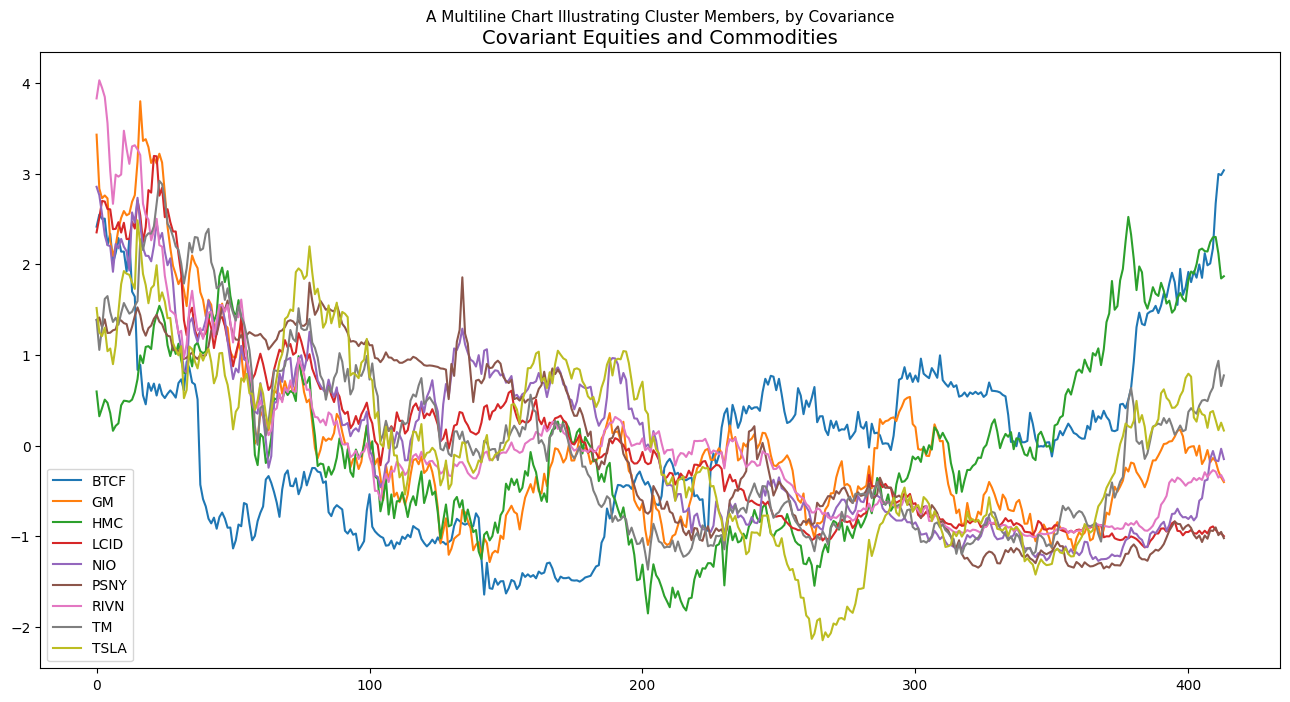

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_gdf = pd.DataFrame(scaler.fit_transform(gdf), columns=gdf.columns)

# plot the dataframe
fig, ax = plt.subplots(figsize=(16, 8))
scaled_gdf.plot.line(ax=ax)

# add title and subtitle
ax.set_title('Covariant Equities and Commodities', fontsize=14)
ax.text(0.5, 1.05, 'A Multiline Chart Illustrating Cluster Members, by Covariance',
        horizontalalignment='center',
        fontsize=11,
        transform=ax.transAxes)
# show the plot
plt.show()


In [24]:
type(gdf.columns)

pandas.core.indexes.base.Index